# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


# libarary

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

#import missingno as msno
#from textwrap import wrap

# Data loading and cleaning

In [ ]:
# Loading dataset
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')

In [ ]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [ ]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [ ]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [ ]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


# EDA - Transaction table merge customer table - dist - strip - rel - heatmap......

## Data Cleaning - Checking and working with missing value

In [ ]:
print(transaction_df.info())

### numerical variables

In [ ]:
# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())
# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
transaction_df = transaction_df.fillna(transaction_df.mean())
# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

1542
788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


###Here, we can see that we have 1542 null values. Which we treated with mean as well as most frequent values as per datatype. Now, as we have completed our data cleaning and understanding, now we will commence the Cohort Analysis.

In [ ]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20001 non-null  object
 1   product_id               20001 non-null  object
 2   customer_id              20001 non-null  object
 3   transaction_date         20001 non-null  object
 4   online_order             19641 non-null  object
 5   order_status             20001 non-null  object
 6   brand                    19804 non-null  object
 7   product_line             19804 non-null  object
 8   product_class            19804 non-null  object
 9   product_size             19804 non-null  object
 10  list_price               20001 non-null  object
 11  standard_cost            19804 non-null  object
 12  product_first_sold_date  19804 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None


In [ ]:
 # group by -> count
 transaction_df['product_line'].value_counts().index[0]

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [ ]:
print(transaction_df.info())
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.1+ MB
None
0


# Assigned the cohorts and calculated the monthly offset

In [ ]:
dt.datetime(transaction_df['transaction_date'][1].year, transaction_df['transaction_date'][1].month, 1)

datetime.datetime(2017, 2, 1, 0, 0)

In [ ]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01,2017-01-01
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01,2017-01-01
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01,2017-04-01
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01,2017-02-01


In [ ]:
transaction_df.groupby('customer_id')['TransactionMonth'].min()

In [ ]:
transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

1       2017-02-01
2       2017-01-01
3       2017-01-01
4       2017-02-01
5       2017-01-01
           ...    
19996   2017-01-01
19997   2017-01-01
19998   2017-04-01
19999   2017-02-01
20000   2017-03-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [ ]:
# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction_df.groupby('customer_id')['TransactionMonth']
# Assigning a minimum InvoiceMonth value to the dataset
transaction_df['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
print(transaction_df.head())

0  transaction_id  product_id  customer_id transaction_date online_order  \
1               1           2         2950       2017-02-25        False   
2               2           3         3120       2017-05-21         True   
3               3          37          402       2017-10-16        False   
4               4          88         3135       2017-08-31        False   
5               5          78          787       2017-10-01         True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date TransactionMonth  \
1       71.49          5

## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [ ]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


In [ ]:
df_48 = transaction_df[(transaction_df['CohortMonth'] == '2017-07-01') & (transaction_df['CohortIndex'] == 5)]

In [ ]:
df_31 = transaction_df[(transaction_df['CohortMonth'] == '2017-07-01') & (transaction_df['CohortIndex'] == 6)]

In [ ]:
df_48.merge(df_31, how ='left', on = 'customer_id')


Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [ ]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [ ]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

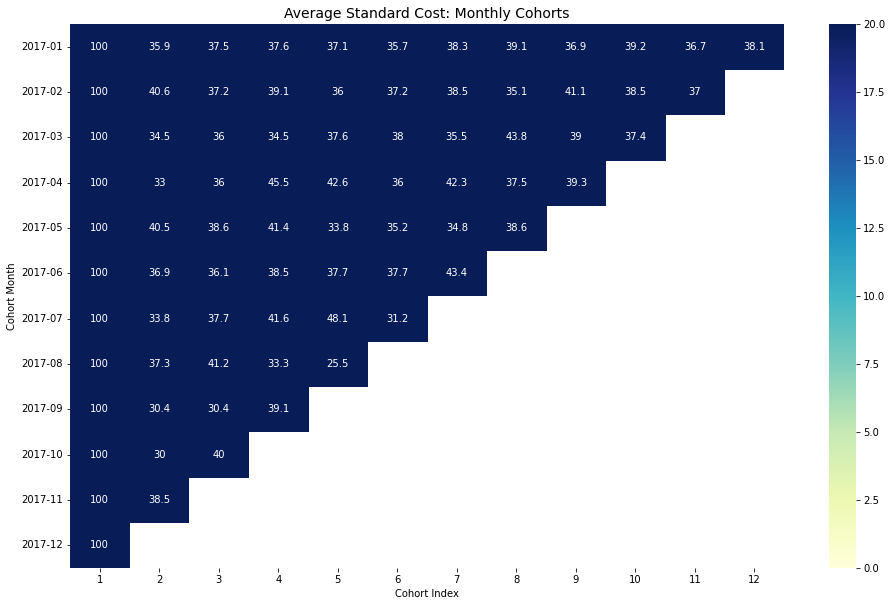

In [ ]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

## Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, It provides both the actual metric values and the color-coding to see the differences in the numbers visually.